In [1]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt

In [274]:
#Inicialização dos cromossomos
#0 - 5
cromoT = []
populacao = 10
genes = 4
for i in range(populacao):
    cromo = []
    for j in range(genes):
        cromo.append(random.randint(1,5))
    
    cromoT.append(cromo)
    
print(cromoT)

[[5, 4, 4, 2], [2, 4, 2, 3], [5, 2, 5, 5], [3, 1, 5, 4], [2, 4, 3, 3], [3, 1, 3, 3], [4, 3, 5, 3], [5, 2, 5, 3], [3, 5, 2, 5], [2, 4, 2, 2]]


In [275]:
#Função objetivo
max_pontos = 100
def obj(cr):
    result = []
    for cromos in cr:
        
        a = cromos[0]
        b = cromos[1]
        c = cromos[2]
        d = cromos[3]
        
        #Equação de bernoulli
        res = (pow(a,2)/2) + (b/c) + 9.8 * d
        
        if res > max_pontos:
            res = max_pontos - (res - max_pontos)
        
        #print(res)
        result.append(res)
        
    return result

obj(cromoT)

[33.1,
 33.400000000000006,
 61.9,
 43.900000000000006,
 32.733333333333334,
 34.233333333333334,
 38.0,
 42.300000000000004,
 56.0,
 23.6]

In [276]:
#Ordenar pontos e cromossomos
def ordena (pontos, cromo):
    zipped = zip(pontos, cromo)

    ordenados = sorted(zipped)

    pontos_ord = []
    cromo_ord = []
    for p, c in ordenados:

        pontos_ord.append(p)
        cromo_ord.append(c)
        
    return pontos_ord, cromo_ord

In [277]:
#Deletando valores com pontuações abaixo do índice
def limiar (pontos_ordenados, cromo_ordenados, taxa):
    #Último ponto abaixo do índice
    limiar = max_pontos * taxa
    ultimo = -1
    for p in range(len(pontos_ordenados)):
        if pontos_ordenados[p] < limiar:
            ultimo = p
        else:
            break;
            
    #Se nenhum for maior que o limiar manter 20 % dos maiores
    if ultimo == (len(pontos_ordenados)-1):
        limite_superior = int(len(pontos_ordenados)*0.8)
        del pontos_ordenados[0:limite_superior]
        del cromo_ordenados[0:limite_superior]  
        
    #deletando valores abaixo do limiar
    elif ultimo > -1: #Ao menos 1 valor abaixo do limiar
        del pontos_ordenados[0:ultimo+1]
        del cromo_ordenados[0:ultimo+1]  
        
    return pontos_ordenados, cromo_ordenados

In [283]:
#Fazendo cruzamentos

def crossover(cromo_, pesos, pop):
    population = pop
    nova_geracao = []
    for c in range (population):

        pai = random.choices(cromo_, weights=pesos)[0]
        id_pai = cromo_.index(pai)
        
        #Se houver mais de 1 cromossomo para a reprodução os pais devem ser diferentes
        if len(cromo_) > 1:
            cromo_.pop(id_pai)
            pesos.pop(id_pai)
            
        mae = random.choices(cromo_, weights=pesos)[0]

        filho = []
        for gene in range(len(pai)):
            gp = pai[gene]
            gm = mae[gene]
            gf = random.choice([gp, gm])
            
            #delimitando genes do filho entre 1 - 10
            if gf > 10:
                gf = 10

            #Adicionando mutação
            gf = round(gf * random.uniform(0.7, 1.3))

            filho.append(gf)

        #print("Filho:",filho)
        nova_geracao.append(filho)
        
    return nova_geracao

In [284]:
geracoes = 10
# Tamanho da população
pop = 10
final_pont_max = []

def evolucao(cromo, geracoes =100):
    max_pontos = 100
    taxa = 0.4
    for ger in range(geracoes):
        #Calculando pontuação
        print("GERAÇÃO: ",ger)
        print("Cromossomos: ",cromo)
        pontos = obj(cromo)
        print("Pontuações: ", pontos)
        
        final_pont_max.append(max(pontos))
        
        #Atualizando cromossomo vencedor
        pontos_max = max(pontos)
        id_max = pontos.index(pontos_max)
        vencedor = cromo[id_max]
        
        #Organizar listas de acordo com a pontuação
        pontos_ord, cromo_ord = ordena(pontos, cromo)

        #deletando valores abaixo do limiar
        if taxa <=0.8:
            taxa = taxa + 0.05
        
        #print(taxa)
        ponto_cut, cromo_cut = limiar(pontos_ord, cromo_ord, taxa)

        #Guardando 20% dos melhores para, além de serem pais, serem utilizados na nova geração
        master = cromo_cut[math.floor(len(cromo_cut)*0.8):]

        #Definindo pesos para os cromossomos
        pesos = [i/max_pontos for i in ponto_cut]
               
        #Crossover
        geracao = crossover(cromo_cut, pesos, pop)
        
        #Adicionando melhores da geração anterior
        for m in master:
            geracao.append(m)
            print(m)
            
        cromo = geracao
        print("--------")
    
    print("Melhor pontuação: ", pontos_max)
    print("Melhor cromossomo: ", vencedor)
        

In [285]:
evolucao(cromoT)

GERAÇÃO:  0
Cromossomos:  [[5, 4, 4, 2], [2, 4, 2, 3], [5, 2, 5, 5], [3, 1, 5, 4], [2, 4, 3, 3], [3, 1, 3, 3], [4, 3, 5, 3], [5, 2, 5, 3], [3, 5, 2, 5], [2, 4, 2, 2]]
Pontuações:  [33.1, 33.400000000000006, 61.9, 43.900000000000006, 32.733333333333334, 34.233333333333334, 38.0, 42.300000000000004, 56.0, 23.6]
[5, 2, 5, 5]
--------
GERAÇÃO:  1
Cromossomos:  [[3, 2, 5, 6], [4, 2, 6, 6], [6, 2, 6, 4], [4, 1, 4, 4], [6, 3, 5, 4], [4, 3, 6, 5], [4, 2, 5, 5], [6, 2, 4, 6], [4, 2, 5, 6], [6, 2, 4, 6], [5, 2, 5, 5]]
Pontuações:  [63.7, 67.13333333333334, 57.53333333333333, 47.45, 57.800000000000004, 57.5, 57.4, 77.30000000000001, 67.2, 77.30000000000001, 61.9]
[6, 2, 4, 6]
[6, 2, 4, 6]
--------
GERAÇÃO:  2
Cromossomos:  [[3, 1, 4, 7], [8, 1, 5, 3], [4, 2, 4, 6], [2, 2, 6, 5], [7, 2, 6, 4], [5, 2, 4, 5], [8, 2, 5, 3], [4, 2, 6, 5], [7, 2, 4, 5], [5, 2, 7, 5], [6, 2, 4, 6], [6, 2, 4, 6]]
Pontuações:  [73.35000000000001, 61.60000000000001, 67.30000000000001, 51.333333333333336, 64.03333333333333,

KeyboardInterrupt: 

### Plotando resultados

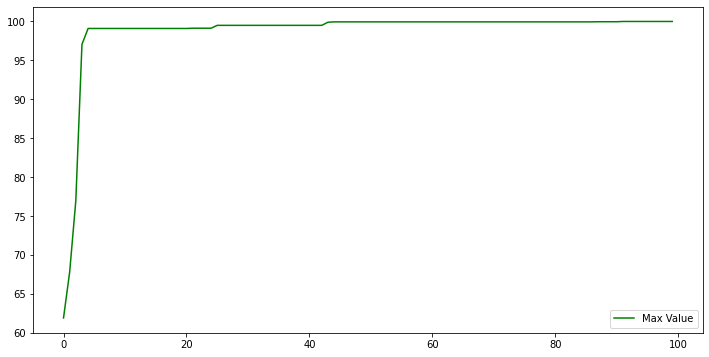

In [281]:
plt.figure(figsize = (12,6))
plt.plot(final_pont_max, color = 'green', label = 'Max Value')

plt.legend()
plt.show()

In [180]:
aa = [[1,2,3],[2,3,4]]
bb = [[1,2,3],[2,3,4]]

for i in range (100):
    a__ = random.choices(aa)[0]
    b__ = random.choices([y for y in bb if y != a__])[0]
    print("A:", a__)
    print("B:", b__)

A: [2, 3, 4]
B: [1, 2, 3]
A: [2, 3, 4]
B: [1, 2, 3]
A: [1, 2, 3]
B: [2, 3, 4]
A: [1, 2, 3]
B: [2, 3, 4]
A: [1, 2, 3]
B: [2, 3, 4]
A: [1, 2, 3]
B: [2, 3, 4]
A: [1, 2, 3]
B: [2, 3, 4]
A: [2, 3, 4]
B: [1, 2, 3]
A: [2, 3, 4]
B: [1, 2, 3]
A: [1, 2, 3]
B: [2, 3, 4]
A: [1, 2, 3]
B: [2, 3, 4]
A: [1, 2, 3]
B: [2, 3, 4]
A: [1, 2, 3]
B: [2, 3, 4]
A: [2, 3, 4]
B: [1, 2, 3]
A: [1, 2, 3]
B: [2, 3, 4]
A: [1, 2, 3]
B: [2, 3, 4]
A: [1, 2, 3]
B: [2, 3, 4]
A: [2, 3, 4]
B: [1, 2, 3]
A: [1, 2, 3]
B: [2, 3, 4]
A: [1, 2, 3]
B: [2, 3, 4]
A: [1, 2, 3]
B: [2, 3, 4]
A: [1, 2, 3]
B: [2, 3, 4]
A: [2, 3, 4]
B: [1, 2, 3]
A: [2, 3, 4]
B: [1, 2, 3]
A: [2, 3, 4]
B: [1, 2, 3]
A: [1, 2, 3]
B: [2, 3, 4]
A: [2, 3, 4]
B: [1, 2, 3]
A: [2, 3, 4]
B: [1, 2, 3]
A: [1, 2, 3]
B: [2, 3, 4]
A: [2, 3, 4]
B: [1, 2, 3]
A: [2, 3, 4]
B: [1, 2, 3]
A: [2, 3, 4]
B: [1, 2, 3]
A: [1, 2, 3]
B: [2, 3, 4]
A: [1, 2, 3]
B: [2, 3, 4]
A: [2, 3, 4]
B: [1, 2, 3]
A: [1, 2, 3]
B: [2, 3, 4]
A: [1, 2, 3]
B: [2, 3, 4]
A: [1, 2, 3]
B: [2, 3, 4]
A: [2, 3, 4]

In [203]:
aa = [[1,2,3],[2,3,4],[3,4,5],[4,5,6]]



In [205]:
aa
aa.pop(1)
aa

[[1, 2, 3], [3, 4, 5], [4, 5, 6]]

In [249]:
math.sqrt(9)

3.0

In [251]:
math.pow(2,3)

8.0